In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('/content/Churn_Modelling.csv')
data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [5]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis =1, inplace = True)

In [6]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [10]:
# label encode Object datatypes

data_types_dict = dict(data.dtypes)
# keep track mappings column name to LabelEncoder
Label_encoder_collection = {}
for col_name, data_type in data_types_dict.items():
  if data_type == 'object':
    Le = LabelEncoder()
    data[col_name] = Le.fit_transform(data[col_name])
    Label_encoder_collection[col_name] = Le

data.info()                      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [11]:
X = data.iloc[:, :-1].values.astype(np.float32)
Y = data.iloc[:, -1].values.astype(int)

In [12]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2, random_state = 4)

In [14]:
# build neural network

# start model with Sequential object
model = tf.keras.models.Sequential()
# add in Input object and specify dimension you want to pass in
model.add(tf.keras.Input(shape=(10,)))
# add in neurons of 1st layer
model.add(tf.keras.layers.Dense(32))  # changed from 16 to 32
# 2nd layer
model.add(tf.keras.layers.Dense(32))
# final layer Sigmoid function to predict (0/1)
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                352       
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [15]:
# create optimizer and compile model

Optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(Optimizer, loss='binary_crossentropy', metrics=["accuracy"])

In [16]:
history = model.fit(Xtrain, Ytrain, validation_data=(Xtest, Ytest), epochs=20)

Epoch 1/20
250/250 [==============================] - 3s 5ms/step - loss: 2502.3367 - accuracy: 0.6464 - val_loss: 209.2929 - val_accuracy: 0.7440
Epoch 2/20
250/250 [==============================] - 1s 4ms/step - loss: 334.8975 - accuracy: 0.6616 - val_loss: 314.2167 - val_accuracy: 0.6695
Epoch 3/20
250/250 [==============================] - 1s 4ms/step - loss: 382.4521 - accuracy: 0.6691 - val_loss: 330.7054 - val_accuracy: 0.5060
Epoch 4/20
250/250 [==============================] - 1s 4ms/step - loss: 320.2637 - accuracy: 0.6791 - val_loss: 178.8580 - val_accuracy: 0.6800
Epoch 5/20
250/250 [==============================] - 1s 4ms/step - loss: 385.0074 - accuracy: 0.6643 - val_loss: 160.8453 - val_accuracy: 0.8020
Epoch 6/20
250/250 [==============================] - 1s 4ms/step - loss: 336.8335 - accuracy: 0.6712 - val_loss: 443.4089 - val_accuracy: 0.8020
Epoch 7/20
250/250 [==============================] - 1s 4ms/step - loss: 436.2528 - accuracy: 0.6765 - val_loss: 254.3150 

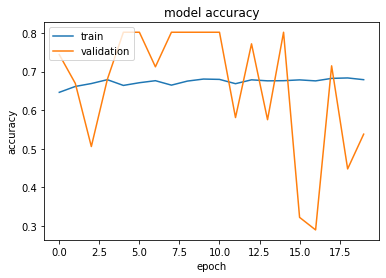

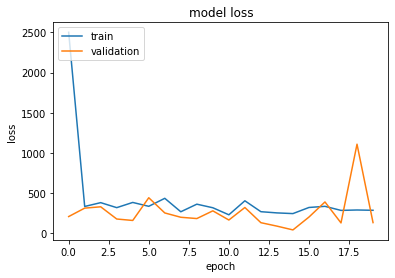

In [17]:
# Accuracy Plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

# Loss Plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

# lots of fluctuations in the accuracy graph, which entails that the learning of the model is unstable

In [18]:
predictions = np.round(model.predict(Xtest))

In [19]:
# accuracy

from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(Ytest, predictions)

0.538

In [20]:
confusion_matrix(Ytest, predictions)

array([[858, 746],
       [178, 218]])